# Bondi-Hoyle-Lyttleton Disk Problem

In [1]:
#import harm_script as harm
# -i option: run the script in Jupyter's namespace
%run -i harm_script.py

In [2]:
import os

# change the directory below to your own, which contains "dumps" subfolder
os.chdir("/Users/astrodoo/Work/WorkShop/2019.07.15_ATA_SummerSchool@UvA/harmpi_output/BHL_DISK")

In [3]:
""" Read the data """
dumpn = 150

rg("gdump")
rd("dump"+"%3.3d"%dumpn)

# compute the coordinates in Cartesian
ph[...] = 0.
cart_coords()
velocity_cart()

print("time: %f (R_g/c)"%t)

time: 1500.019287 (R_g/c)


In [4]:
""" calculate the distance between the black hole and the disk """

dist_disk_init = 100 
v_inf = 0.2
bh_loc = v_inf*t - dist_disk_init

print("distance between the black hole and the disk: %f (Rg)"%bh_loc)

distance between the black hole and the disk: 200.003857 (Rg)


## Draw the density contour

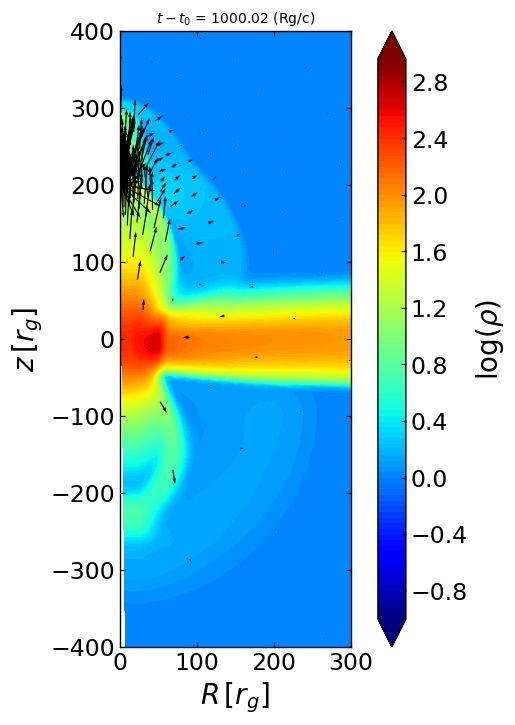

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(7,8))
xmax=300  
ymax=400

# change the coordinate to the disk frame
X_diskfr = X.copy()
X_diskfr[3] = X_diskfr[3] + bh_loc

plc(np.log10(rho),xy=1,xcoord=X_diskfr[1],ycoord=X_diskfr[3],xmax=xmax,ymax=ymax, \
    levels=np.linspace(-1,3.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'log($\rho$)',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=False)

ax.set_title(r'$t-t_0$ = %.2f (Rg/c)'%(bh_loc/v_inf),fontsize=10)


skip1 = 10 # reduce the number of arrows
skip2 = 10 # reduce the number of arrows
ar_width = 0.005 # thickness of the arrows
ar_scale = 2 # scale of the arrows

#gamma = 1./np.sqrt(1.-v_inf*v_inf)
vu_rel = vu_cart[:,::skip1,::skip2,0].copy()
vu_rel[3] = vu_rel[3] + v_inf
ax.quiver(X_diskfr[1,::skip1,::skip2,0],X_diskfr[3,::skip1,::skip2,0], \
          vu_rel[1], vu_rel[3], \
          scale=ar_scale, width=ar_width)

ax.set_aspect('equal')

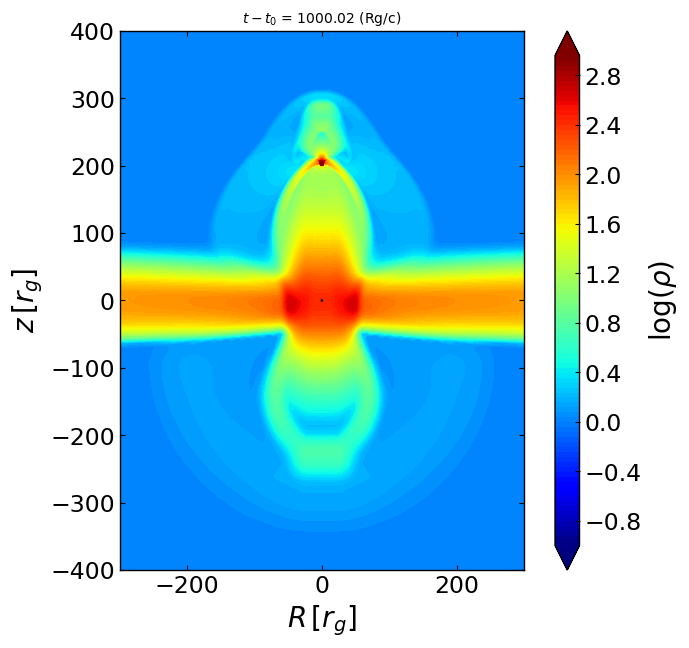

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(8,7))
xmax=300  
ymax=400

# change the coordinate to the disk frame
X_diskfr = X.copy()
X_diskfr[3] = X_diskfr[3] + bh_loc

plc(np.log10(rho),xy=1,xcoord=X_diskfr[1],ycoord=X_diskfr[3],xmax=xmax,ymax=ymax, \
    levels=np.linspace(-1,3.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'log($\rho$)',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=True)

ax.set_title(r'$t-t_0$ = %.2f (Rg/c)'%(bh_loc/v_inf),fontsize=10)
ax.set_aspect('equal')

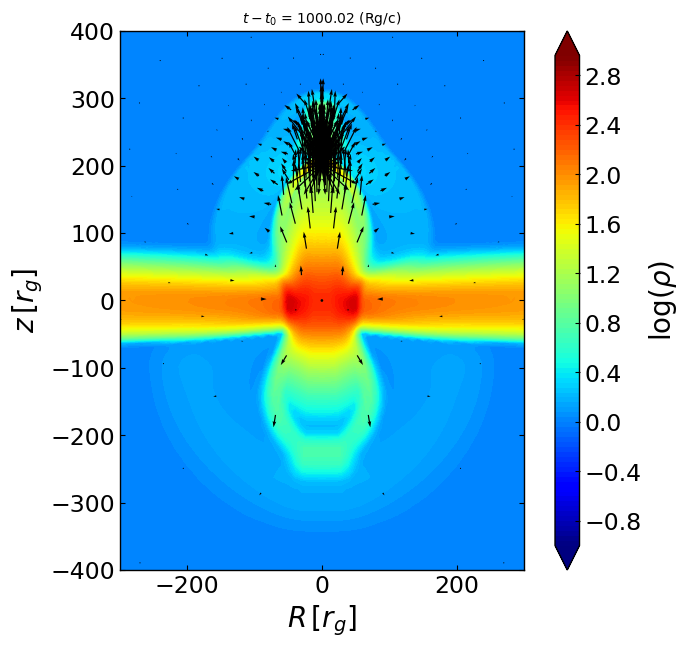

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(8,7))
xmax=300  
ymax=400

# change the coordinate to the disk frame
X_diskfr = X.copy()
X_diskfr[3] = X_diskfr[3] + bh_loc

plc(np.log10(rho),xy=1,xcoord=X_diskfr[1],ycoord=X_diskfr[3],xmax=xmax,ymax=ymax, \
    levels=np.linspace(-1,3.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'log($\rho$)',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=True)

ax.set_title(r'$t-t_0$ = %.2f (Rg/c)'%(bh_loc/v_inf),fontsize=10)


skip1 = 10 # reduce the number of arrows
skip2 = 10 # reduce the number of arrows
ar_width = 0.003 # thickness of the arrows
ar_scale = 4 # scale of the arrows

#gamma = 1./np.sqrt(1.-v_inf*v_inf)
vu_rel = vu_cart[:,::skip1,::skip2,0].copy()
vu_rel[3] = vu_rel[3] + v_inf
ax.quiver(X_diskfr[1,::skip1,::skip2,0],X_diskfr[3,::skip1,::skip2,0], \
          vu_rel[1], vu_rel[3], \
          scale=ar_scale, width=ar_width)
ax.quiver(-X_diskfr[1,::skip1,::skip2,0],X_diskfr[3,::skip1,::skip2,0], \
          -vu_rel[1], vu_rel[3], \
          scale=ar_scale, width=ar_width)

ax.set_aspect('equal')

## Density contour with sampled velocity vectors

In [8]:
def sample_velo(bh_loc=0.,v_inf=0.2,xmax=300,ymax=400,smp_nx=10,smp_ny=20):
    """
    generate the sample of (x,y,ux,uy) for drawing the velocity vectors
    
    kwargs -
        bh_loc:        black hole location
        v_inf:         velocity at infinity
        smp_nx/smp_ny: sample size of the velocity vectors
        xmax/ymax:     size of the plot
    """
    from scipy.ndimage import map_coordinates as mapcd

    # set the parameters for data sample
    unix = np.linspace(0,xmax,smp_nx)
    uniy = np.linspace(-ymax,ymax,smp_ny) - bh_loc

    # generate the grid in 2D
    xsmp,ysmp = np.meshgrid(unix,uniy,indexing='ij')

    # convert to spherical coordinates
    rsmp = np.sqrt(xsmp*xsmp + ysmp*ysmp)
    hsmp = np.arccos(ysmp/rsmp)

    # find the indices of the grid in the data-sample
    iind_int = np.zeros((smp_nx,smp_ny),dtype=np.float32)
    jind_int = np.zeros((smp_nx,smp_ny),dtype=np.float32)
    for i in range(smp_nx):
        for j in range(smp_ny):
            if (np.max(r[:,0,0]) > rsmp[i,j]):
                iind = np.where(r[:,0,0]>rsmp[i,j])[0][0]
                if (iind != 0):
                    iind_int[i,j] = iind + (rsmp[i,j] - r[iind,0,0])/(r[iind,0,0]-r[iind-1,0,0])
                else:
                    iind_int[i,j] = -1
            else: 
                iind_int[i,j] = len(r[:,0,0])-1
            
            if (np.max(h[0,:,0]) > hsmp[i,j]):
                jind = np.where(h[0,:,0]>hsmp[i,j])[0][0]
                if (jind != 0):
                    jind_int[i,j] = jind + (hsmp[i,j] - h[0,jind,0])/(h[0,jind,0]-h[0,jind-1,0])
                else:
                    jind_int[i,j] = -1
            else:
                jind_int[i,j] = len(h[0,:,0])-1
        
    # interpolate the velocities
    vxsmp  = (mapcd(vu_cart[1,:,:,0],[[iind_int],[jind_int]],order=1,mode='nearest'))[0]
    vysmp  = (mapcd(vu_cart[3,:,:,0],[[iind_int],[jind_int]],order=1,mode='nearest'))[0] + v_inf
    
    # recover y coordinate 
    ysmp = ysmp + bh_loc
    
    return (xsmp,ysmp,vxsmp,vysmp)

In [9]:
xsmp,ysmp,vxsmp,vysmp = sample_velo(bh_loc=bh_loc,v_inf=v_inf,xmax=300,ymax=400,smp_nx=15,smp_ny=20)

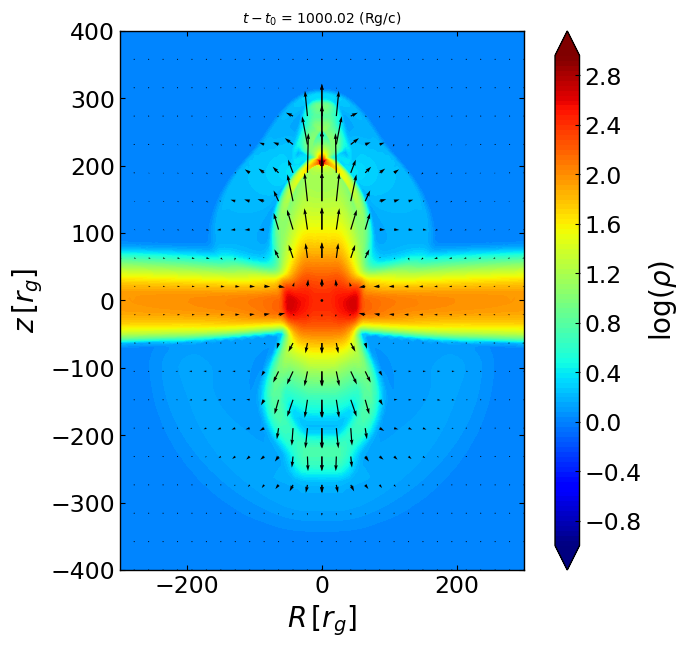

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(8,7))
xmax=300  
ymax=400

# change the coordinate to the disk frame
X_diskfr = X.copy()
X_diskfr[3] = X_diskfr[3] + bh_loc

plc(np.log10(rho),xy=1,xcoord=X_diskfr[1],ycoord=X_diskfr[3],xmax=xmax,ymax=ymax, \
    levels=np.linspace(-1,3.,100,endpoint=False), \
    xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'log($\rho$)',
    cb=True,isfilled=True,ax=ax,cmap='jet',extend='both',symmx=True)

ax.set_title(r'$t-t_0$ = %.2f (Rg/c)'%(bh_loc/v_inf),fontsize=10)

ar_width = 0.003 # thickness of the arrows
ar_scale = 4 # scale of the arrows

ax.quiver( xsmp,ysmp, vxsmp,vysmp,scale=ar_scale, width=ar_width)
ax.quiver(-xsmp,ysmp,-vxsmp,vysmp,scale=ar_scale, width=ar_width)

ax.set_aspect('equal')

## make a movie

In [13]:
def movie_BHLdisk(startn=0,endn=-1,ar_width=0.003,ar_scale=4, smp_nx=15, smp_ny=20, \
                  xmax=300,ymax=400,dist_disk_init=100.,v_inf=0.2):
    """
        kwargs -
            startn:         start dump number
            endn:           end dump number
            ar_width:       arrow width
            ar_scale:       arrow scale
            smp_nx/smp_ny:  sample size of the velocity vectors
            xmax/ymax:      size of the plot
            dist_disk_init: initial distance between the disk and the black hole (Rg)
            v_inf:          velocity at the infinity
    """
    import os
    if (not os.path.isdir('images')): os.mkdir('images')
        
    for idump in range(startn,endn+1):
        # set the figure configuration
        fig,ax = plt.subplots(figsize=(8,7))
    
        # read the data
        #rg("gdump")
        rd("dump"+"%3.3d"%idump)

        # compute the coordinates in Cartesian
        ph[...] = 0.
        cart_coords()
        velocity_cart()
        
        # calculate the distance between the black hole and the disk
        bh_loc = v_inf*t - dist_disk_init
        
        # change the coordinate to the disk frame
        X_diskfr = X.copy()
        X_diskfr[3] = X_diskfr[3] + bh_loc

        plc(np.log10(rho),xy=1,xcoord=X_diskfr[1],ycoord=X_diskfr[3], \
            xmax=xmax,ymax=ymax,levels=np.linspace(-1,3,100,endpoint=False), \
            xla=r'$R\, [r_g]$',yla=r'$z\, [r_g]$',cbyla=r'log($\rho$)',
            cb=True,isfilled=True,ax=ax,cmap='jet',extend='max',symmx=True)

        ax.set_title(r'$t-t_0$ = %.2f (Rg/c)'%(bh_loc/v_inf),fontsize=10)
        
        # draw velocity vectors with sampled data
        xsmp,ysmp,vxsmp,vysmp = sample_velo(bh_loc=bh_loc,v_inf=v_inf,xmax=xmax,ymax=ymax,\
                                            smp_nx=smp_nx,smp_ny=smp_ny)
        
        ax.quiver( xsmp, ysmp, vxsmp, vysmp, scale=ar_scale, width=ar_width)
        ax.quiver(-xsmp, ysmp,-vxsmp, vysmp, scale=ar_scale, width=ar_width)
        
        ax.set_xlim(-xmax,xmax)
        ax.set_ylim(-ymax,ymax)
        ax.set_aspect('equal')
        
        fig.tight_layout()
        fig.savefig('images/BHLdisk_%3.3d.png'%idump)
        plt.clf()
        plt.close()
        print('%d of %d'%(idump,endn+1))

In [14]:
movie_BHLdisk(startn=0,endn=200)

0 of 201
1 of 201
2 of 201
3 of 201
4 of 201
5 of 201
6 of 201
7 of 201
8 of 201
9 of 201
10 of 201
11 of 201
12 of 201
13 of 201
14 of 201
15 of 201
16 of 201
17 of 201
18 of 201
19 of 201
20 of 201
21 of 201
22 of 201
23 of 201
24 of 201
25 of 201
26 of 201
27 of 201
28 of 201
29 of 201
30 of 201
31 of 201
32 of 201
33 of 201
34 of 201
35 of 201
36 of 201
37 of 201
38 of 201
39 of 201
40 of 201
41 of 201
42 of 201
43 of 201
44 of 201
45 of 201
46 of 201
47 of 201
48 of 201
49 of 201
50 of 201
51 of 201
52 of 201
53 of 201
54 of 201
55 of 201
56 of 201
57 of 201
58 of 201
59 of 201
60 of 201
61 of 201
62 of 201
63 of 201
64 of 201
65 of 201
66 of 201
67 of 201
68 of 201
69 of 201
70 of 201
71 of 201
72 of 201
73 of 201
74 of 201
75 of 201
76 of 201
77 of 201
78 of 201
79 of 201
80 of 201
81 of 201
82 of 201
83 of 201
84 of 201
85 of 201
86 of 201
87 of 201
88 of 201
89 of 201
90 of 201
91 of 201
92 of 201
93 of 201
94 of 201
95 of 201
96 of 201
97 of 201
98 of 201
99 of 201
100 of 201